In [1]:
!pip install underthesea
!pip install gensim
!pip install fasttext
!pip install pyvi

     |████████████████████████████████| 7.6 MB 9.8 MB/s 
     |████████████████████████████████| 581 kB 51.3 MB/s 
     |████████████████████████████████| 235 kB 59.5 MB/s 
     |████████████████████████████████| 965 kB 50.3 MB/s 
     |████████████████████████████████| 68 kB 4.4 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3142485 sha256=f819f6154f9e0760a1aed119515f17731332a4055c442de31b5f6d333ba9a01d
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext
     |████████████████████████████████| 8.5 MB 13.7 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import keras
import fasttext
import numpy as np
import pandas as pd
import gensim, re
import string

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

from keras.models import Sequential 
from keras.layers import Dense, Embedding 
from keras.layers import LSTM 

from underthesea import word_tokenize
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, GRU, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow import math

In [4]:
from tqdm import tqdm
import numpy as np
import gensim 
import matplotlib.pyplot as plt
from underthesea import word_tokenize
import pickle
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras

In [5]:
import pandas as pd
names = ["classes", "content"]
dataset = pd.read_excel("/content/drive/MyDrive/NLP_BTL/data/data.xlsx", names=names,header=None)
dataset.columns =['classes', 'content']

In [6]:
import regex as re
from underthesea import word_tokenize
 
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
dicchar = loaddicchar()

# Hàm chuyển Unicode dựng sẵn về Unicde tổ hợp (phổ biến hơn)
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            # for index2 in nguyen_am_index:
            #     if index2 != index:
            #         x, y = nguyen_am_to_ids[chars[index]]
            #         chars[index2] = bang_nguyen_am[x][0]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
        else:
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
        # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
        # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
    return ''.join(chars)


def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True


def chuan_hoa_dau_cau_tieng_viet(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        # print(cw)
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)

def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

In [7]:
import pandas as pd
def text_preprocess(document):
    # xóa html code
    document = remove_html(document)
    # chuẩn hóa unicode
    document = convert_unicode(document)
    # chuẩn hóa cách gõ dấu tiếng Việt
    document = chuan_hoa_dau_cau_tieng_viet(document)
    # tách từ
    document = word_tokenize(document, format="text")
    # đưa về lower
    document = document.lower()
    # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    
    return document


f = open("/content/drive/MyDrive/NLP_BTL/data/data.txt",'r',encoding = 'utf-8')
document = f.read() 


document = text_preprocess(document)
print(document)


2 sản_phẩm rất đẹp chất_liệu vải quá tuyệt_vời nên mua mọi người nha_shop phục_vụ chu_đáo sẽ ủng họi_shop nếu mua lần tiếp_theo rất hài_lòng về sản_phẩm kg thất_vọng chút nào _ _ _ _ 2 do_dự mãi mới dám mua mà ko ngờ chất_lượng tuyệt_vời đến vậy lun giá rẻ mà chất_lượng quá tuyệt_shop ơi mua lần đầu mà quất hẳn 3 bộ shop ko làm mk thất_vọng sẽ ủng_hộ dài_dài hình_ảnh mang tính_chất nhận xu 2 sản_phẩm chất_lượng rất tốt có điều chữ trên túi đựng bị như hình nên hơi thất_vọng 2 áo rẻ nhưng chất_lượng khá tốt không gây thất_vọng sẽ ủng_hộ_shop lần nữa shop che tên sp dùm 2 vì là hàng ord nên lâu lắm luôn mình đặt từ 2710 mà 2011 mới nhận đc hàng nhưng chất_lượng rất ok mà hình_như loại này vải mỏng hơn so vs áo đợt trước mình mua hơi thất_vọng tí 2_shop gói hàng bình_thường giao hàng cũng bình_thường chất_lượng hàng cũng bình_thường mình đọc các đánh_giá khác thì thấy rất ok nên mới mua khi nhận hàng thì thất_vọng hàng ko được ok lắm mn cân_nhắc khi mua nha 2 đặt 1 mẫu giao 1 mẫu khác báo

In [8]:
count = {}
for line in open('/content/drive/MyDrive/NLP_BTL/data/data.txt'):
    key = line.split()[0]
    count[key] = count.get(key, 0) + 1

for key in count:
    print(key, count[key])

-2 199
-1 203
0 383
1 9215
2 8851
3 3439


In [9]:
# Thống kê các word xuất hiện ở tất cả các nhãn
total_label = 18
vocab = {}
label_vocab = {}
for line in open('/content/drive/MyDrive/NLP_BTL/data/data.txt'):
    words = line.split()
    # lưu ý từ đầu tiên là nhãn
    label = words[0]
    if label not in label_vocab:
        label_vocab[label] = {}
    for word in words[1:]:
        label_vocab[label][word] = label_vocab[label].get(word, 0) + 1
        if word not in vocab:
            vocab[word] = set()
        vocab[word].add(label)

count = {}
for word in vocab:
    if len(vocab[word]) == total_label:
        count[word] = min([label_vocab[x][word] for x in label_vocab])
        
sorted_count = sorted(count, key=count.get, reverse=True)
for word in sorted_count[:100]:
    print(word, count[word])

In [10]:
# Chia tập train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
test_percent = 0.2

text = []
label = []

for line in open('/content/drive/MyDrive/NLP_BTL/data/data.txt'):
    words = line.strip().split()
    label.append(words[0])
    text.append(' '.join(words[1:]))

X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=test_percent, random_state=42)

# Lưu train/test data
# Giữ nguyên train/test để về sau so sánh các mô hình cho công bằng
with open('/content/drive/MyDrive/NLP_BTL/data/data_train.txt', 'w') as fp:
    for x, y in zip(X_train, y_train):
        fp.write('{} {}\n'.format(y, x))

with open('/content/drive/MyDrive/NLP_BTL/data/data_test.txt', 'w') as fp:
    for x, y in zip(X_test, y_test):
        fp.write('{} {}\n'.format(y, x))

# encode label
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print(list(label_encoder.classes_), '\n')
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

print(X_train[0], y_train[0], '\n')
print(X_test[0], y_test[0])

['-1', '-2', '0', '1', '2', '3'] 

Sản_phẩm tốt Hình_ảnh chỉ mang tính_chất minh_họa h j kbkbk kbhvvkbk 4 

Đóng_gói cẩn_thận áo đúng mô_tả giá hợp_lí nói_chung quá ok chất áo mặc mát 4


In [11]:
print(dataset.shape)

(22290, 2)


In [12]:
dataset.head(100)

,classes,content
0,-2,Sản_phẩm rất đẹp chất_liệu vải quá tuyệt_vời n...
1,-2,Do_dự mãi mới dám mua mà ko ngờ chất_lượng tuy...
2,-2,Sản_phẩm chất_lượng rất tốt có điều chữ trên t...
3,-2,Áo rẻ nhưng chất_lượng khá tốt Không gây thất_...
4,-2,Vì là hàng ord nên lâu lắm luôn Mình đặt từ 27...
...,...,...
95,-2,Giao nhanh hơn dự_kiến mình đặt 1 giữ_nhiệt và...
96,-2,Đặt_hàng tam_giác lại ship quần_đùi hoi thất_v...
97,-2,Giao hàng nhanh áo thì k đuoc như trong ảnh Nê...
98,-2,Chất ổn mọi người nên mua ủng_hộ shop nhé mình...


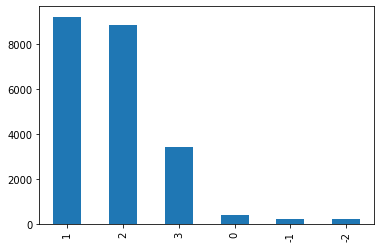

In [13]:
dataset["classes"].value_counts().plot.bar()